# Traffic Sign Classifier


### Load The Data

In [33]:
# Load pickled data
import pickle

training_file = 'train.p'
validation_file= 'valid.p'
testing_file =  'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

print('Data Loaded')

Data Loaded


### Summary of Data 

In [31]:
import numpy as np

n_train = X_train.shape[0]
n_validation = X_valid.shape[0]
n_test = X_test.shape[0]
image_shape = X_train.shape[1:3]
n_classes = len(np.unique(y_test))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Number of testing samples =",n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)


Number of training examples = 34799
Number of testing examples = 12630
Number of testing samples = 12630
Image data shape = (32, 32)
Number of classes = 43


### Plot Random Images From Training Set

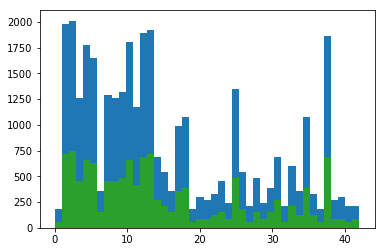

In [36]:
import matplotlib.pyplot as plt
import random
%matplotlib inline

"""
#Plot images from the features set
image_num = random.randint(0,n_train)
image = X_train[image_num]
if(len(image.shape) > 2):
    imgplot = plt.imshow(image)
else:
    imgplot = plt.imshow(image,cmap='gray')
"""
    
plt.hist(y_train,43)
plt.hist(y_valid,43)
plt.hist(y_test,43)
plt.show()

### Pre-process the Data Set 

In [4]:
def rgb2gray(images):
    
    r, g, b = images[:,:,:,0], images[:,:,:,1], images[:,:,:,2]
    gray = 0.2126 * r + 0.7152* g + 0.0722 * b
    return gray

#Convert to grayscale and reshape
if(len(X_train.shape) > 3):
    X_train = np.reshape(rgb2gray(X_train),(n_train,32,32,1))
    X_valid = np.reshape(rgb2gray(X_valid),(n_validation,32,32,1))
    X_test = np.reshape(rgb2gray(X_test),(n_test,32,32,1))


    
print("Images converted to grayscale")

Images converted to grayscale


### Model Architecture

In [5]:
#Example architecture
from tensorflow.contrib.layers import flatten

def LeNet(x,keep_prob):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.01
    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x10.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 10), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(10))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # Activation.
    conv1 = tf.nn.relu(conv1)

    # Pooling. Input = 28x28x10. Output = 14x14x10.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    #Dropout
    conv1 = tf.nn.dropout(conv1,keep_prob)
    
    # Layer 2: Convolutional Input = 14x14x10 Output = 10x10x24.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 10, 24), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(24))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # Activation.
    conv2 = tf.nn.relu(conv2)

    # Pooling. Input = 10x10x24. Output = 5x5x24.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    #Dropout
    conv2 = tf.nn.dropout(conv2,keep_prob)
    
    # Flatten. Input = 5x5x16. Output = 600.
    fc0   = flatten(conv2)
    
    # Layer 3: Fully Connected. Input = 600. Output = 240.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(600, 240), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(240))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Activation.
    fc1    = tf.nn.relu(fc1)

    # Layer 4: Fully Connected. Input = 240. Output = 120.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(240, 120), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(120))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # Activation.
    fc2    = tf.nn.relu(fc2)

    # Layer 5: Fully Connected. Input = 120. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(120, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

### Build the Model

In [12]:
import tensorflow as tf
#Training Parameters
learning_rate = 0.0002
EPOCHS = 50
BATCH_SIZE = 128
KEEP_PROB = 0.65

#Model
keep_prob = tf.placeholder(tf.float32)
x = tf.placeholder(tf.float32,shape=(None,32,32,1))
logits=LeNet(x,keep_prob)

y = tf.placeholder(tf.int32,(None))
one_hot_y = tf.one_hot(y,43)


# Calculate the loss
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y,logits=logits)
loss = tf.reduce_mean(cross_entropy)

#Set up the optimizer
optimizer = tf.train.AdamOptimizer(learning_rate)
training_op = optimizer.minimize(loss)

print("Model Built")

Model Built


### Model Evaluation

In [13]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
prediction = tf.argmax(logits,1)
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

softmax_logits = tf.nn.softmax(logits)
top_k = tf.nn.top_k(softmax_logits,k=5)

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y,keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Train the Model

In [14]:
from sklearn.utils import shuffle

with tf.Session() as sess:
    #Initiate variables
    init = tf.global_variables_initializer()
    sess.run(init)
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_op, feed_dict={x: batch_x, y: batch_y,keep_prob:KEEP_PROB})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")
        

Training...

EPOCH 1 ...
Validation Accuracy = 0.239

EPOCH 2 ...
Validation Accuracy = 0.587

EPOCH 3 ...
Validation Accuracy = 0.719

EPOCH 4 ...
Validation Accuracy = 0.789

EPOCH 5 ...
Validation Accuracy = 0.812

EPOCH 6 ...
Validation Accuracy = 0.851

EPOCH 7 ...
Validation Accuracy = 0.866

EPOCH 8 ...
Validation Accuracy = 0.875

EPOCH 9 ...
Validation Accuracy = 0.898

EPOCH 10 ...
Validation Accuracy = 0.916

EPOCH 11 ...
Validation Accuracy = 0.919

EPOCH 12 ...
Validation Accuracy = 0.932

EPOCH 13 ...
Validation Accuracy = 0.912

EPOCH 14 ...
Validation Accuracy = 0.932

EPOCH 15 ...
Validation Accuracy = 0.932

EPOCH 16 ...
Validation Accuracy = 0.926

EPOCH 17 ...
Validation Accuracy = 0.930

EPOCH 18 ...
Validation Accuracy = 0.934

EPOCH 19 ...
Validation Accuracy = 0.928

EPOCH 20 ...
Validation Accuracy = 0.935

EPOCH 21 ...
Validation Accuracy = 0.941

EPOCH 22 ...
Validation Accuracy = 0.925

EPOCH 23 ...
Validation Accuracy = 0.931

EPOCH 24 ...
Validation Accura

### Test the Model on the Test Set

In [15]:
with tf.Session() as sess:
    saver.restore(sess, './lenet')

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy = 0.933


## Step 3: Test Model on Images from the Internet


### Load and Output the Images

(1, 32, 32, 3)
(1, 32, 32, 3)
(1, 32, 32, 3)
(1, 32, 32, 3)
(1, 32, 32, 3)


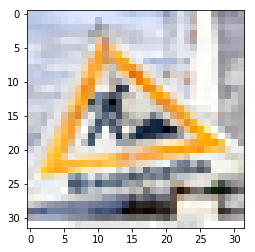

In [44]:
import matplotlib.image as mpimg
from PIL import Image
from scipy import ndimage

size = [32,32]
images = []
y_internet = np.array([23,14,1,13,25])

for i in range(1,6):
    img_loc = 'germansigns/sign' + str(i) + '.jpg'
    img = Image.open(img_loc)
    img = img.resize(size,Image.ANTIALIAS)
    img = np.array(img)
    img = np.resize(img,(1,32,32,3))
    
    images.append(img)
    print(img.shape)

X_internet = np.vstack(images)

#Plot image
image = X_internet[4]
imgplot = plt.imshow(image)

#Convert to grayscale
#X_internet = np.resize(rgb2gray(X_internet),(X_internet.shape[0],32,32,1))


### Predict the Sign Type for Each Image

In [17]:
with tf.Session() as sess:
    saver.restore(sess, './lenet')
    
    prediction = sess.run(prediction, feed_dict={x: X_internet, y: y_internet,keep_prob: 1.0})
    print("Prediction is " + str(prediction))
    
    validation_accuracy = evaluate(X_internet, y_internet)
    print("Accuracy is " + str(validation_accuracy))
    

INFO:tensorflow:Restoring parameters from ./lenet
Prediction is [23 14 36 13 10]
Accuracy is 0.600000023842


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

In [39]:
with tf.Session() as sess:
    saver.restore(sess, './lenet')
    softmax = sess.run(top_k,feed_dict={x: X_internet, y: y_internet,keep_prob: 1.0})
    print("Top Softmax are: ")
    np.set_printoptions(precision=5,suppress=True)
    print(softmax[0])

INFO:tensorflow:Restoring parameters from ./lenet
Top Softmax are: 
[[ 1.       0.       0.       0.       0.     ]
 [ 0.99995  0.00004  0.00001  0.       0.     ]
 [ 0.75724  0.17651  0.02278  0.02167  0.02018]
 [ 1.       0.       0.       0.       0.     ]
 [ 0.90352  0.09557  0.00089  0.00002  0.     ]]


### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.